In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline
import geopandas as gpd

# Fires
Fires play a large role in the number of accidents in any given city and are a crucial metric in deciding the accident safety of any neighborhood. Disparities in prevalence between neighborhoods can come down to problems complex as a faulty fire department or simple as the material the homes were built of. There are 1,318,500 fires in the U.S. a year, causing over 3,500 deaths and $25.6 billion in losses, thus making it an essential statistic. We are measuring this metric based on the number of fires in a neighborhood, with a lower number of fires being better. The dataset being used is a record of all fire incidents in the city of Pittsburgh since 2013. The analyis will analyze this data, adjusting for population. Specifically, we will analyze by neighborhood using both a bar graph and a heat map of Pittsburgh.

In [81]:
fire_inc = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02",
                       index_col="call_no", parse_dates=True)
total_pop = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv",
                       index_col = "Id")
fire_inc.sample(5)

,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
call_no,,,,,,,,,,,,,,,,,
F150008590,113.0,"Cooking fire, confined to container","300 BLOCK STRATFORD AVE, PITTSBURGH PA 15232",2015-02-01T18:19:50,1,231EN08,807.0,Friendship,7.0,8.0,4.200308e+10,2.0,8.0,5.0,3-23,40.460952,-79.933605
F150081846,111.0,Building fire,"100 BLOCK WABASH ST, PITTSBURGH PA 15220",2015-10-16T18:28:41,1,231EN30,2019.0,West End,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.438220,-80.034614
F140026294,143.0,Grass fire,"900 BLOCK IDLEWOOD AVE, PITTSBURGH PA 15205",2014-04-12T17:28:19,0,231EN29,2805.0,East Carnegie,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.416041,-80.074731
F150021264,111.0,Building fire,"800 BLOCK PROCTOR WAY, PITTSBURGH PA 15210",2015-03-18T16:13:56,1,231EN22,1803.0,Allentown,3.0,18.0,4.200318e+10,4.0,18.0,3.0,4-6,40.420345,-79.993690
F160102158,118.0,"Trash or rubbish fire, contained","1500 BLOCK NAPOLEON ST, PITTSBURGH PA 15216",2016-12-20T21:17:54,1,231EN28,1916.0,Beechview,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-28,40.412205,-80.029371


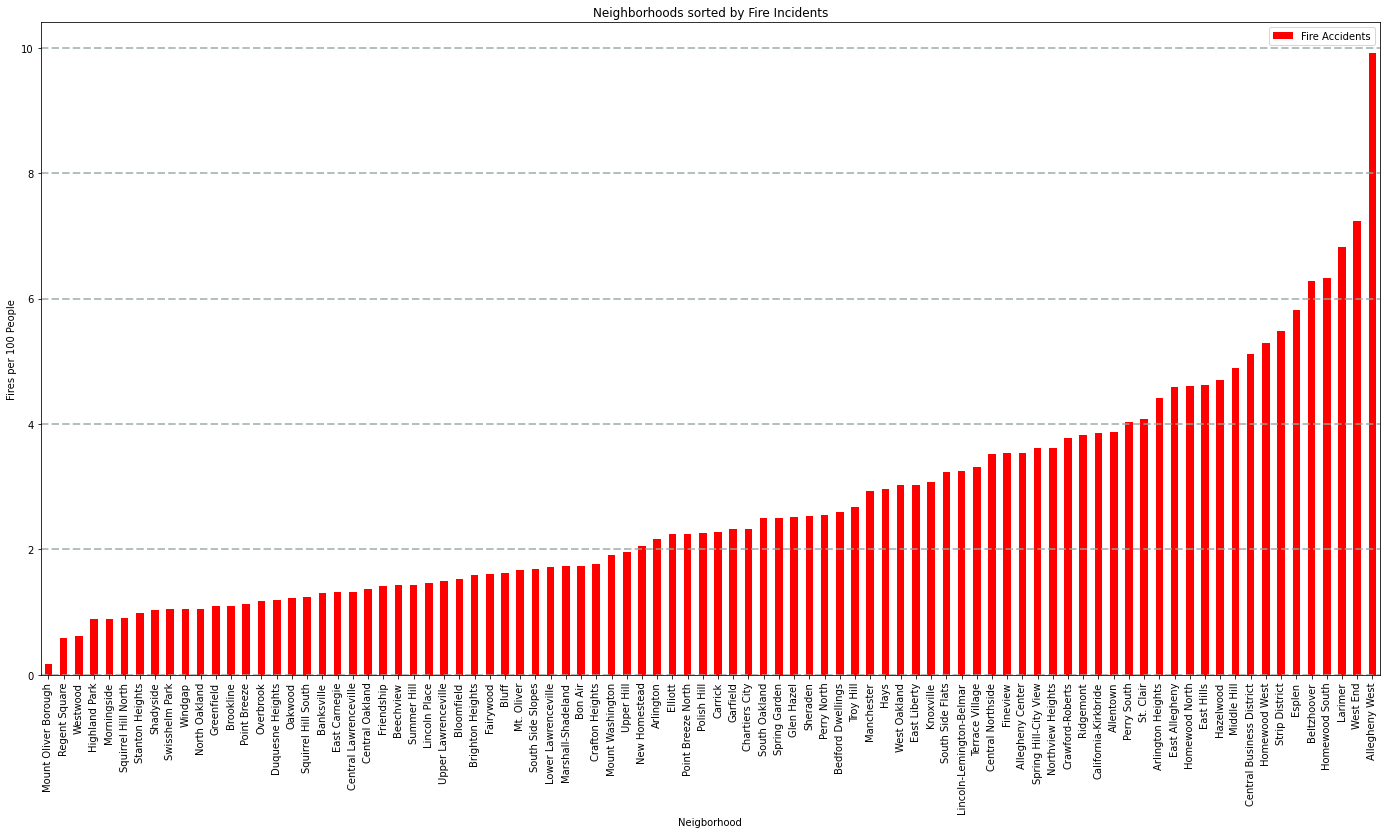

In [10]:
fires = dict()
pops = dict()

for i in range(len(fire_inc)):
    if(fire_inc.iloc[i,7] in fires):
        fires[fire_inc.iloc[i,7]] += 1
    else:
        fires[fire_inc.iloc[i,7]] = 1       

for i in range(len(total_pop)):
       if(total_pop.iloc[i,0] in fires):
            fires[total_pop.iloc[i,0]] = ((float)(fires.get(total_pop.iloc[i,0]) / total_pop.iloc[i,1]) * 100)
sorted_fires = sorted(fires.items(), key=lambda x:x[1])

keys = []
values = []
for v in sorted_fires:
    keys.append(v[0])
    values.append(v[1])

for i in range(4):
    keys.pop(len(keys)-1)
    values.pop(len(values)-1)

df = pd.DataFrame(values, columns = ['Fire Accidents'], index= keys)
df.plot(kind='bar', color = 'red')
plt.title("Neighborhoods sorted by Fire Incidents")
plt.xlabel("Neigborhood")
plt.ylabel("Fires per 100 People")
plt.rcParams["figure.figsize"] = (24,12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

In [89]:
pitt = gpd.read_file("http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/dbd133a206cc4a3aa915cb28baa60fd4_0.zip")

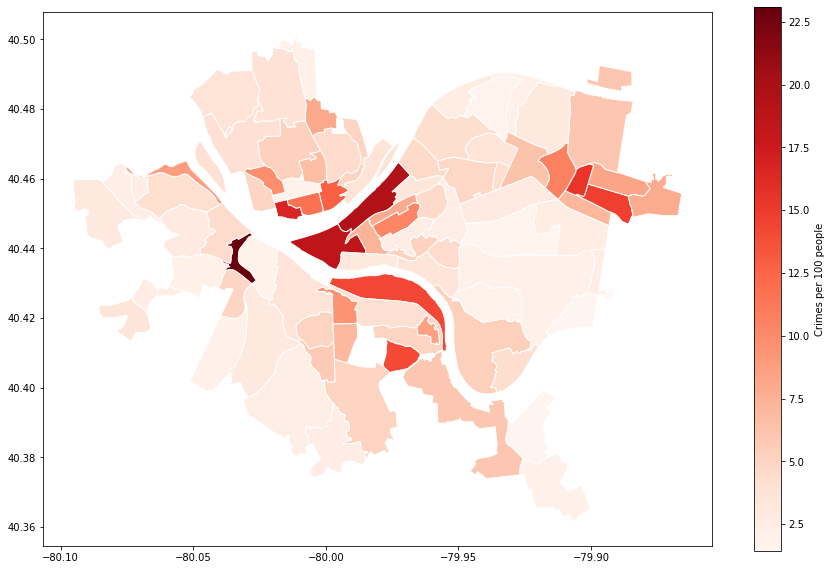

In [91]:
fire_df = {'hood':keys, 'fires':values}
fire_df = pd.DataFrame.from_dict(fire_df)
merge_fire = pitt.set_index('hood').join(fire_df.set_index('hood'))
merge_fire.plot(column='fires', 
               cmap='Reds',              
               edgecolor="white",       
               legend=True,             
               legend_kwds={'label': "Crimes per 100 people"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "white"}
               )
plt.show()

---
# Crime
Just as fires are an essential piece of neighborhood safety, crime is even more so, with homicides accounting for 18 thousand deaths a year. Further, crime is an important mettric because it often is an indicator of other aspects of the quality of neoghborhood, whether it be funding, average income, and even average education levels. Through our dataset, we will be measuring crime safety based on the number of crimes in a given neighborhood, with a lower number being better. The dataset being used is a record of all crime occurances in the city of Pittsburgh since 2005. The analyis will analyze this data, adjusting for population and getting a yearly average, by neighborhood using both a bar graph and a heat map of Pittsburgh.

In [4]:
crime_inc = pd.read_csv("https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e", index_col="PK")
crime_inc.sample(5)

,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
PK,,,,,,,,,,,,,,
2814410,16032425.0,99,2016-02-19T12:00:00,"100 Block 35th ST Pittsburgh, PA 15201",N,Lower Lawrenceville,2,NaN,9999 Miscellaneous Report (No Crime),603.0,7.0,2.0,-79.968732,40.464911
3121733,19231985.0,6,2019-11-13T14:47:00,"4900 Block 2nd AV Pittsburgh, PA 15207",Y,Hazelwood,4,RETAIL THEFT (SHOPLIFTING),3929 Retail Theft.,1515.0,5.0,3.0,-79.944367,40.409775
2830174,16085919.0,6,2016-05-11T02:00:00,"Melwood AV & Centre AV Pittsburgh, PA 15213",N,North Oakland,4,THEFT FROM AUTO,3934 Theft from Vehicle,507.0,8.0,3.0,-79.950862,40.452233
3094659,19147325.0,18,2019-07-26T20:19:00,"Frankstown AV & N Murtland ST Pittsburgh, PA 1...",Y,Homewood West,5,MARIJUANA-POSSESS,4524 Windshield Obstructions and Wipers. / 13(...,1207.0,9.0,2.0,-79.901119,40.458498
2822633,16073624.0,29,2016-04-22T20:30:00,"3100 Block Frederick ST Pittsburgh, PA 15212",Y,Marshall-Shadeland,1,RUNAWAYS - JUVENILE,029 Missing Juvenile,2715.0,1.0,1.0,-80.030779,40.473385


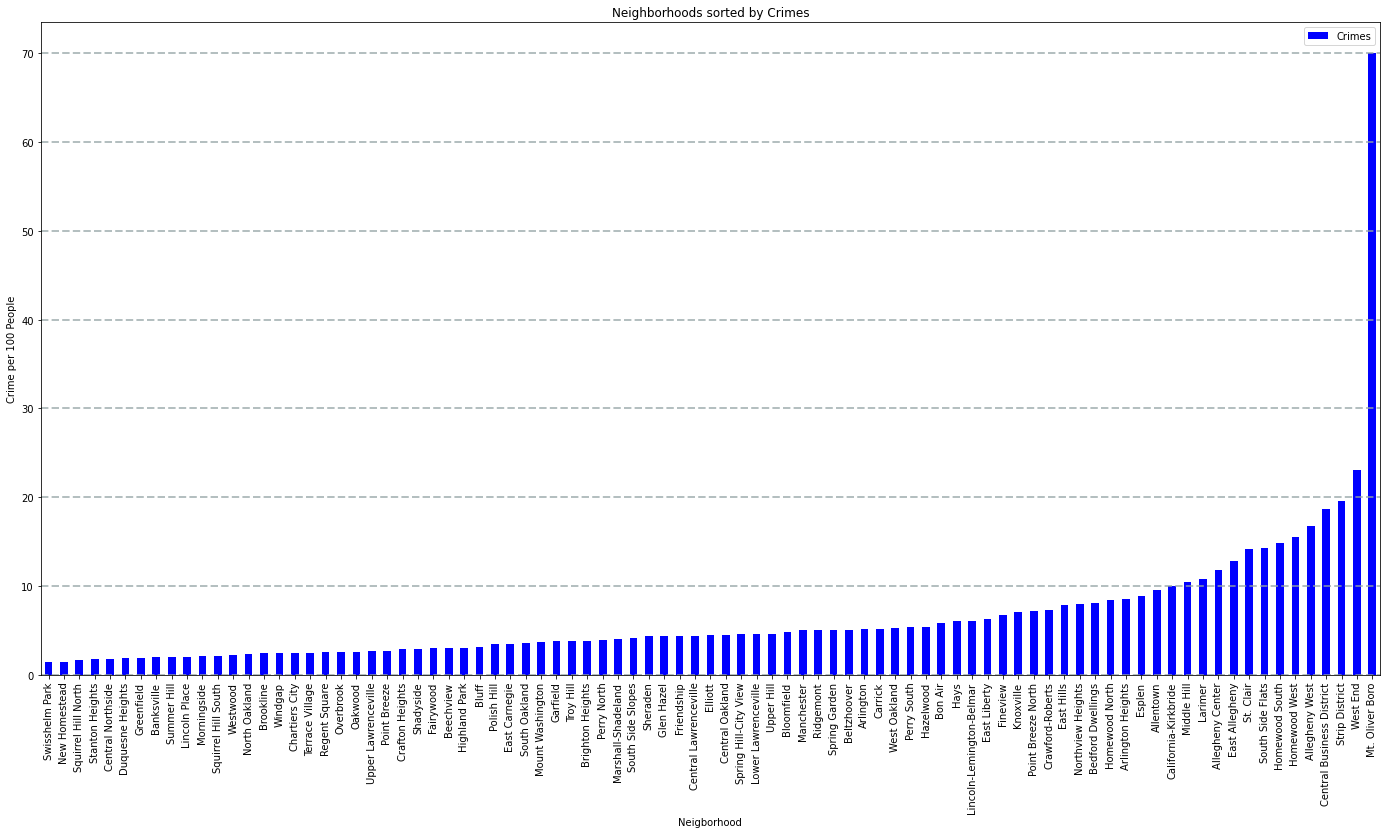

In [96]:
crime = dict()
for i in range(len(crime_inc)):
    if(crime_inc.iloc[i,5] in crime):
        crime[crime_inc.iloc[i,5]] += 1
    else:
        crime[crime_inc.iloc[i,5]] = 1    
        
for i in range(len(total_pop)):
       if(total_pop.iloc[i,0] in crime):
            crime[total_pop.iloc[i,0]] = ((float)(crime.get(total_pop.iloc[i,0]) / total_pop.iloc[i,1]) * 100)/15
sorted_crime = sorted(crime.items(), key=lambda x:x[1])

keys = []
values = []
for v in sorted_crime:
    keys.append(v[0])
    values.append(v[1])
    
for i in range(12):
    keys.pop(len(keys)-1)
    values.pop(len(values)-1)

df = pd.DataFrame(values, columns = ['Crimes'], index= keys)
df.plot(kind='bar', color = 'blue')
plt.title("Neighborhoods sorted by Crimes")
plt.xlabel("Neigborhood")
plt.ylabel("Crime per 100 People")
plt.rcParams["figure.figsize"] = (24,12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

In [97]:
pitt = gpd.read_file("http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/dbd133a206cc4a3aa915cb28baa60fd4_0.zip")

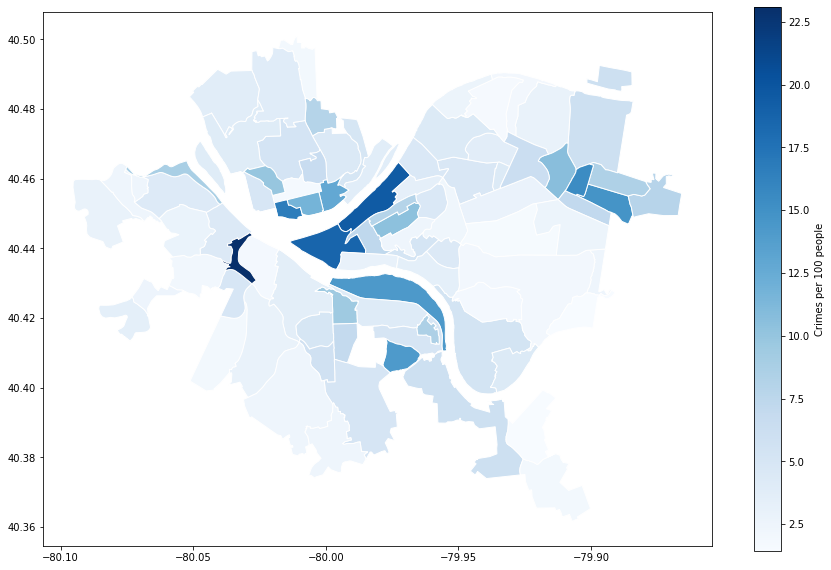

In [98]:
crime_df = {'hood':keys, 'crime':values}
crime_df = pd.DataFrame.from_dict(crime_df)
merge_crime = pitt.set_index('hood').join(crime_df.set_index('hood'))
merge_crime.plot(column='crime', 
               cmap='Blues',              
               edgecolor="white",       
               legend=True,             
               legend_kwds={'label': "Crimes per 100 people"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "white"}
               )
plt.show()

### Analysis
The results of the crime incidents show similar trends to that of the fire data, with many of the neighborhoods ranking high. Notably, Mount Oliver Borough, Squirrel Hill and Swissvale rank highly again, putting them in contention for the safest neighborhoods in Pittsburgh. The geographic trends are dually constent as the center of the city tend to produce higher crime even when adjusted for population. Also, again, the busnisess districts in Pittsburgh like the Strip District performed poorly due to the high volume of people and busniess occurring in its confines. Therefore, again, if you are picking a neighborhood solely on your safety, it is best to pick a home in the more residentially designated areas. As of now, Mount Oliver Borough has been the safest Pittsburgh area, claiming both the lowest crime and fire rate in the city.

---
### James Duty's Conclusion:
The data-driven determination of the best neighborhood is much different than my personal favorite neighborhood in Pittsburgh, which is the Strip District. Further, I do not think that the best neighborhood to live in should be your favorite neighborhood. I believe the best neighborhood to live in is the neighborhood that where you feel the safest and where you can unwind. Thus, based on that beleif, we developed the metric used in this project to find the best neighborhood.

However, that should not be your favorite neighborhood, with your favorite neighborhood being the place you like explore and have new experiences. For example, I would never want to live in the Strip District, it is too loud and has too many people bustling around the different businesses, but I enjoy spending time there for the same reasons, it offers the experience of a large city in a small one. Part of the beauty of Pittsburgh is that it offers the experience of city life in the Northeast with the small-town feelings of the Midwest, making it a comfortable midground to live in. This data analysis of the city is a perfect way to depict this as the results show that there areas that are beyond safe to live in while there are still neighborhoods that offer the types of experiences akin to the large cities in the Northeast like Boston and Philadelpia.

The Strip District performed poorly in our safety metrics and I completely expected it too, but it still is my favorite neighborhood. Despite the data-driven determination not calculating my favorite neighborhood, I believe that it calculates the best neighborhood to live in because the best neighborhood is the one where you have the most peace of mind.